In [56]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [57]:
data=pd.read_csv("crop_yield_data.csv")
data.head(5)

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         3000 non-null   int64
 1   soil_quality_index  3000 non-null   int64
 2   farm_size_hectares  3000 non-null   int64
 3   sunlight_hours      3000 non-null   int64
 4   fertilizer_kg       3000 non-null   int64
 5   crop_yield          3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB


In [59]:
data.describe()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1263.095000,5.506667,498.801000,7.995333,1549.450333,328.099000
std,432.371756,2.855172,287.122742,2.621501,814.326919,145.036503
min,500.000000,1.000000,10.000000,4.000000,100.000000,46.000000
25%,896.000000,3.000000,242.000000,6.000000,869.750000,199.000000
50%,1277.000000,6.000000,505.000000,8.000000,1542.000000,332.000000
75%,1636.000000,8.000000,741.000000,10.000000,2225.000000,455.000000
max,2000.000000,10.000000,1000.000000,12.000000,3000.000000,628.000000


In [60]:
data.isnull().sum()

rainfall_mm           0
soil_quality_index    0
farm_size_hectares    0
sunlight_hours        0
fertilizer_kg         0
crop_yield            0
dtype: int64

<Axes: >

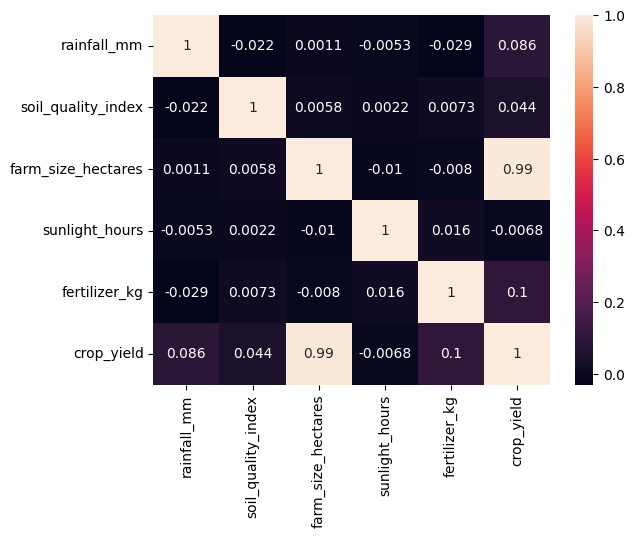

In [61]:
sns.heatmap(data.corr(),annot=True)

In [62]:
ss=StandardScaler()
x=data.drop(["crop_yield"],axis=1)
y=data["crop_yield"]
x=ss.fit_transform(x)

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [64]:
models={
    "Linear Regression":LinearRegression(),
    "Random Forest Regression":RandomForestRegressor(),
    "Decision Tree Regression":DecisionTreeRegressor(),
    "Ridge Regression":Ridge(),
    "Lasso Regression":Lasso(),
    "Support Vector Regression":SVR(),
    "XGBoost Regression":XGBRegressor(),
    "KNN Regression":KNeighborsRegressor(),
    "MLP Regression":MLPRegressor()
}

In [68]:
regression_results={}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    regression_results[model_name] = {"MSE": mse, "R2": r2}
    print(f"{model_name} - MSE: {mse:.2f}, R2: {r2*100:.2f}")

Linear Regression - MSE: 0.08, R2: 100.00
Random Forest Regression - MSE: 36.50, R2: 99.83
Decision Tree Regression - MSE: 130.06, R2: 99.39
Ridge Regression - MSE: 0.08, R2: 100.00
Lasso Regression - MSE: 4.21, R2: 99.98
Support Vector Regression - MSE: 2690.60, R2: 87.44
XGBoost Regression - MSE: 23.44, R2: 99.89
KNN Regression - MSE: 582.84, R2: 97.28
MLP Regression - MSE: 1261.57, R2: 94.11


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [69]:
final_results={
    "Regression Model":["Linear Regression","Random Forest Regression","Decision Tree Regression","Ridge Regression","Lasso Regression","Support Vector Machine","XGBoost Regression","KNN","MLP"],
    "Accuracy(R2 Score)":[100,99.83,99.39,100,99.98,87.44,99.89,97.28,94.11]
}

In [70]:
Final=pd.DataFrame(final_results)

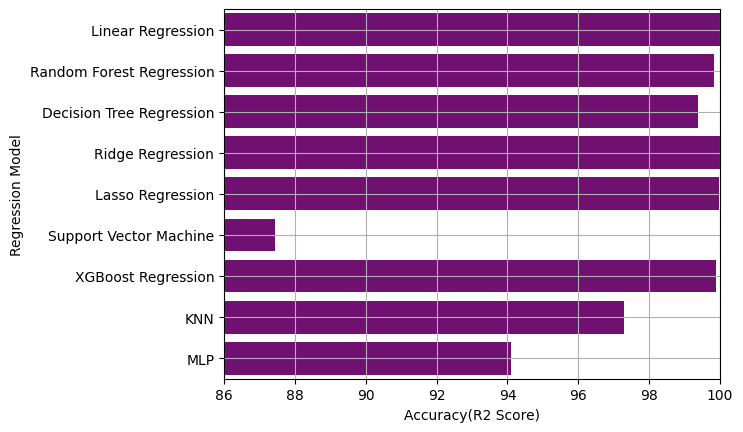

In [85]:
sns.barplot(y="Regression Model",x="Accuracy(R2 Score)",data=Final,color="purple")
plt.xlim(86,100)
plt.grid()
plt.show()